# Project 4 By Eli Weiss

This project is intended to see if we will be able to use Scikit to predict if a Mushroom will be Poisonous

Definitions for the fields we are looking at are as follows:

**P:** 1 = is poisonous 0 = not <br/>
**Odor:** almond  =  1 , anise  =  2, creosote  =  3, fishy  =  4, foul  =  5, musty  =  6, none  =  7, pungent  =  8, spicy  =  9 <br/>
**Ringnumber:** 0 = no rings, 1 = one ring, 2 = 2 rings <br/>
**Habitat:** grasses  =  1, leaves  =  2, meadows  =  3, paths  =  4, urban  =  5, waste  =  6, woods  =  7


## Phase I: Data Cleaning and EDA

#### Data Cleaning

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/enwweiss/DAV-5400/master/Data_MLProject.csv')
data.head()

In [53]:
#choose the columns that we will be using
df1 = pd.DataFrame(data, columns = ['Y', 'odors', 'ring-number','habitat'])
df1.head()

,Y,odors,ring-number,habitat
0,p,p,o,u
1,e,a,o,g
2,e,l,o,m
3,p,p,o,u
4,e,n,o,g


In [62]:
#transform  Y into 1/0
p=pd.get_dummies(df1.Y)
p=p['p']
p=pd.DataFrame(p)

In [75]:
#transform odor into numerical class variable
odor = []
for i in range(len(df1['odors'])):
    if df1['odors'][i] == 'a':
        odor.append(1)
    elif df1['odors'][i] == 'l':
        odor.append(2)
    elif df1['odors'][i] == 'c':
        odor.append(3)
    elif df1['odors'][i] == 'y':
        odor.append(4)
    elif df1['odors'][i] == 'f':
        odor.append(5)
    elif df1['odors'][i] == 'm':
        odor.append(6)
    elif df1['odors'][i] == 'n':
        odor.append(7)
    elif df1['odors'][i] == 'p':
        odor.append(8)
    elif df1['odors'][i] == 's':
        odor.append(9)
odor = pd.DataFrame(odor)
odor.columns = ['odor']
odor.head()

,odor
0,8
1,1
2,2
3,8
4,7


In [76]:
#transform ringnumber into numerical class variable
ringnumber = []
for i in range(len(df1['ring-number'])):
    if df1['ring-number'][i] == 'n':
        ringnumber.append(0)
    elif df1['ring-number'][i] == 'o':
        ringnumber.append(1)
    elif df1['ring-number'][i] == 't':
        ringnumber.append(2)
ringnumber = pd.DataFrame(ringnumber)
ringnumber.columns = ['ringnumber']
ringnumber.head()

,ringnumber
0,1
1,1
2,1
3,1
4,1


In [77]:
#transform habitat into numerical class variable

habitat = []
for i in range(len(df1['habitat'])):
    if df1['habitat'][i] == 'g':
        habitat.append(1)
    elif df1['habitat'][i] == 'l':
        habitat.append(2)
    elif df1['habitat'][i] == 'm':
        habitat.append(3)
    elif df1['habitat'][i] == 'p':
        habitat.append(4)
    elif df1['habitat'][i] == 'u':
        habitat.append(5)
    elif df1['habitat'][i] == 'w':
        habitat.append(6)
    elif df1['habitat'][i] == 'd':
        habitat.append(7)
        
habitat = pd.DataFrame(habitat)
habitat.columns = ['habitat']
habitat.head()


,habitat
0,5
1,1
2,3
3,5
4,1


In [82]:
#take all four feilds and build a new dataframe out of them  
data = pd.concat([p, odor, ringnumber,habitat], axis = 1)
data.head()

,p,odor,ringnumber,habitat
0,1,8,1,5
1,0,1,1,1
2,0,2,1,3
3,1,8,1,5
4,0,7,1,1


#### EDA

In [83]:
import seaborn as sns

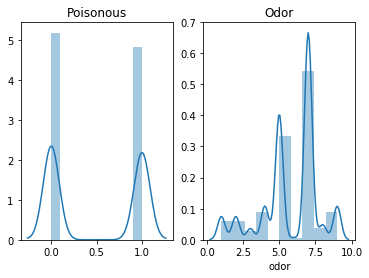

In [86]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data.p, bins = 10)
plt.title('Poisonous')
plt.xlabel(' ')
plt.subplot(122)
sns.distplot(data.odor, bins = 10)
plt.title('Odor')
plt.show()

We see that the distribution of Poisonous vs not is relativly even. <br/>
Odor on the other hand is skewed with most of the data falling on values 6 and 7

If Odor being equal to 6 or 7 is indicitive of a Mushroom being Poisonous this will be an excellent predictor.


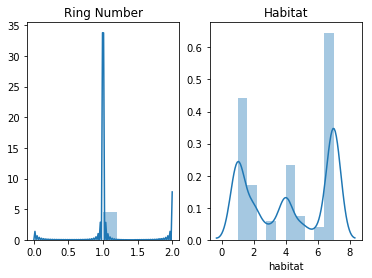

In [87]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data.ringnumber, bins = 10)
plt.title('Ring Number')
plt.xlabel(' ')
plt.subplot(122)
sns.distplot(data.habitat, bins = 10)
plt.title('Habitat')
plt.show()

In [90]:
print(sum(data.ringnumber == 0))
print(sum(data.ringnumber == 1))
print(sum(data.ringnumber == 2))

36
7488
600


Ring number is exteamly skewed with almost all of the population having one ring. <br/>
Habitat is more evenly distributed which will be better for our analysis. 

If Ring Number being equal to 1 is indicitive of a Mushroom being Poisonous this will be an excellent predictor.
Since Habitat is more evenly distibuted it may not be the best predictor. 

# Phase II: Build Predictive Model

Now we are going to try and build a predictive model using Logistc regression

In [128]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

This model needs to have the x's and the Y seperate

In [164]:
x = data[['odor','ringnumber','habitat']]
y = data['p']

Now we are going to split the data into testing and a training set we are going to set the training to 75% of the data

In [159]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split


X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Now we are going to fit the Logistic Regression 

In [160]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we have fit the model, let's use the pest data to make a prediction to see how accurate the model is

In [161]:
#use the prediction function
y_pred=logreg.predict(X_test)

Let's also check the overall fit of the model

In [162]:
#get the R2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-1.2655032696250372

The R2 is exreamly low, this model will likely perform poorly.

In [163]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[709, 352],
       [796, 174]], dtype=int64)

Now that we have seen that the model preforms poorly let's isolate the X values that are preforming poorly in the model. 

Let's re-run this model with only odor as a predictor

In [165]:
x = pd.DataFrame(data['odor'])
y = data['p']
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#use the prediction function
y_pred=logreg.predict(X_test)
#get the R2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.092219944226901385

The model has a much higher R2! Odor is a predictor which explains some of the variation in the data about 9.2%

Let's re-run this model with only ringnumber as a predictor

In [166]:
x = pd.DataFrame(data['ringnumber'])
y = data['p']
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#use the prediction function
y_pred=logreg.predict(X_test)
#get the R2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.87871002846954305

The model has negative R2 which means that Ringnumber is not a good predictor and is not explaining the variation in the data. 

Let's re-run this model with only Habitat as a predictor

In [167]:
x = pd.DataFrame(data['habitat'])
y = data['p']
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#use the prediction function
y_pred=logreg.predict(X_test)
#get the R2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-1.2655032696250372

The model has negative R2 which means that Habitat is not a good predictor and is not explaining the variation in the data. 

The above shows us that this model is not a good fit and has poor prediction power. 
Next steps for this analysis would include choosing new preditors (keeping Odor and removing Habitat and Ring Number) from the data set and trying other classification methods such as KNN and LDA and QDA. 